In [17]:
# import necessary modules
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# drop unnecessary feature

df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [20]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df['Geography'].replace({'France':0,'Spain':1,'Germany':2},inplace=True)

In [21]:
df.shape

(10000, 11)

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# # Dividing dependent and independent variables
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
model=clf.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

acc_score=accuracy_score(y_test, y_pred)
p_score=precision_score(y_test,y_pred)
re_score=recall_score(y_test,y_pred)
f_score=f1_score(y_test,y_pred)

print(f'Accuracy score of the model is {acc_score}')
print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

Accuracy score of the model is 0.8728
precision score of the model is 0.7896440129449838
recall score of the model is 0.4909456740442656
f1_score of the model is 0.6054590570719602


In [27]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[1938,   65],
       [ 253,  244]], dtype=int64)

<AxesSubplot:>

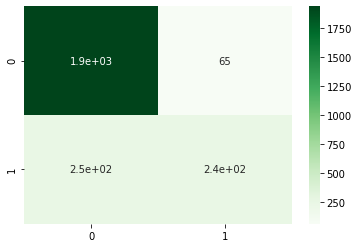

In [28]:
sns.heatmap(confusion_m, annot=True,cmap='Greens')

In [29]:
# Saving model
import pickle
pickle.dump(model, open('pickle.pkl','wb'))

In [30]:
# Loading model to compare the results
model = pickle.load(open('pickle.pkl','rb'))
print(model.predict([[432, 1, 0, 34, 3, 44440,2 , 1, 0,50000]]))

[0]
